In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv('train.csv')

In [61]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [62]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [63]:
import pandas as pd
# df = df.dropna(subset=['question1', 'question2'], inplace=True)

# Assuming your DataFrame is named 'df'
df = df.dropna(subset=['question1', 'question2'])


In [65]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [66]:
import re
from bs4 import BeautifulSoup

def preprocess_text(text):
    """
    Preprocess text by performing the following operations:
    1. Convert to lowercase and strip whitespace
    2. Replace special characters with words
    3. Handle number abbreviations (k, m, b)
    4. Expand contractions
    5. Remove HTML tags
    6. Remove special characters and extra spaces
    
    Args:
        text (str): Input text to be processed
        
    Returns:
        str: Processed text
    """
    # Convert to string, lowercase, and strip whitespace
    text = str(text).lower().strip()
    
    # Replace special characters with their word equivalents
    char_replacements = {
        '%': ' percent',
        '$': ' dollar ',
        '₹': ' rupee ',
        '€': ' euro ',
        '@': ' at ',
        '[math]': ''  # Remove math tags
    }
    for char, replacement in char_replacements.items():
        text = text.replace(char, replacement)
    
    # Handle number abbreviations (thousands, millions, billions)
    text = re.sub(r'([0-9]+),000,000,000', r'\1b', text)
    text = re.sub(r'([0-9]+),000,000', r'\1m', text)
    text = re.sub(r'([0-9]+),000', r'\1k', text)
    text = re.sub(r'([0-9]+)000000000', r'\1b', text)
    text = re.sub(r'([0-9]+)000000', r'\1m', text)
    text = re.sub(r'([0-9]+)000', r'\1k', text)
    
    # Expand contractions
    contractions = { 
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
    }
    
    # Replace contractions using regex for whole words only
    for contraction, expansion in contractions.items():
        text = re.sub(r'\b' + contraction + r'\b', expansion, text)
    
    # Handle remaining apostrophe cases
    text = re.sub(r"'ve\b", " have", text)
    text = re.sub(r"n't\b", " not", text)
    text = re.sub(r"'re\b", " are", text)
    text = re.sub(r"'ll\b", " will", text)
    
    # Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Remove special characters and extra spaces
    text = re.sub(r'[^\w\s]', ' ', text)  # Replace non-word/space chars with space
    text = re.sub(r'\s+', ' ', text)      # Collapse multiple spaces
    text = text.strip()
    
    return text

In [67]:
preprocess_text("I've already! wasn't <b>done</b>?")

'i have already was not done'

In [68]:
df['question1'] = df['question1'].apply(preprocess_text)
df['question2'] = df['question2'].apply(preprocess_text)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided ...,0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0


In [69]:
df['q1_len'] = df['question1'].str.len() 
df['q2_len'] = df['question2'].str.len()

In [70]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided ...,0,48,54,11,12
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7


In [71]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [72]:
df['word_common'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,7
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided ...,0,48,54,11,12,0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4


In [73]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [74]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,7,24
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided ...,0,48,54,11,12,0,20
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4,20


In [75]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23,0.48
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,7,24,0.29
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24,0.17
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided ...,0,48,54,11,12,0,20,0.00
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4,20,0.20


In [76]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [77]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [78]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,23,0.48,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,...,24,0.29,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,24,0.17,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided ...,0,48,54,11,12,...,20,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,...,20,0.20,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0


In [83]:
import distance
import pandas as pd

# Sample DataFrame setup (only if df isn't already defined)
# df = pd.DataFrame({'question1': [...], 'question2': [...]})

def fetch_length_features(row):
    q1 = str(row['question1'])  # convert to string to avoid issues
    q2 = str(row['question2'])
    
    length_features = [0.0] * 3
    
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return pd.Series(length_features)
    
    # 1. Absolute length difference
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    # 2. Average length
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2
    
    # 3. Longest common substring ratio
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1) if strs else 0.0
    
    return pd.Series(length_features)

In [84]:
# Apply and assign to new columns
df[['abs_len_diff', 'mean_len', 'longest_substr_ratio']] = df.apply(fetch_length_features, axis=1)

In [85]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,0.982456
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,...,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,0.571429
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,0.169492
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided ...,0,48,54,11,12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,11.5,0.040816
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,...,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,0.153846


In [86]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [87]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [88]:
print(df.shape)
df.head()

(404287, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,0.785709,0.0,1.0,2.0,13.0,0.982456,93,100,93,100
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,...,0.466664,0.0,1.0,5.0,12.5,0.571429,65,73,63,86
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,0.285712,0.0,1.0,4.0,12.0,0.169492,43,46,63,63
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided ...,0,48,54,11,12,...,0.000000,0.0,0.0,1.0,11.5,0.040816,10,12,25,28
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,...,0.307690,0.0,1.0,6.0,10.0,0.153846,36,55,47,67


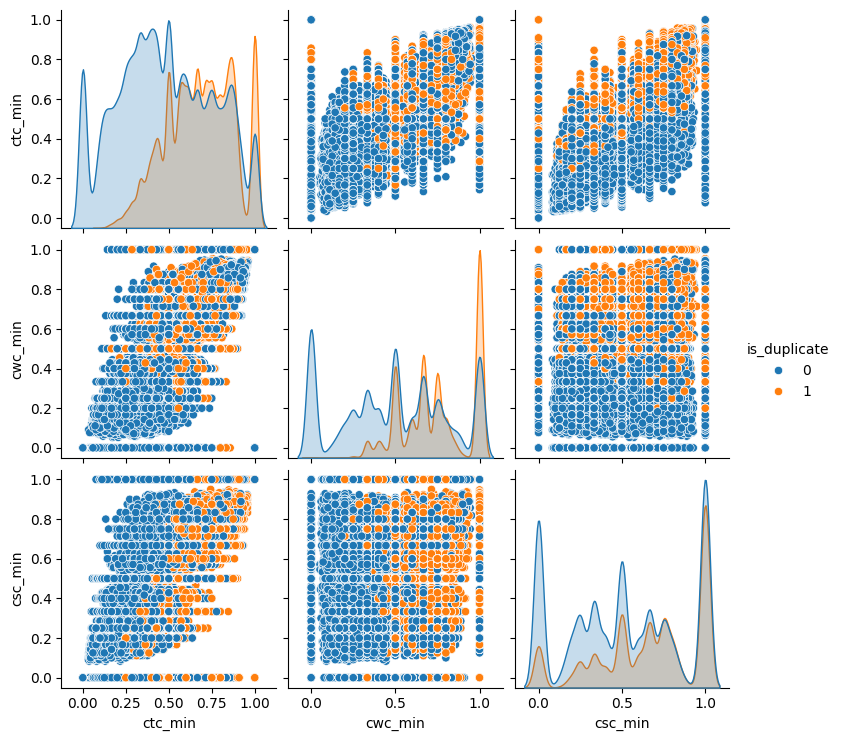

In [89]:
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

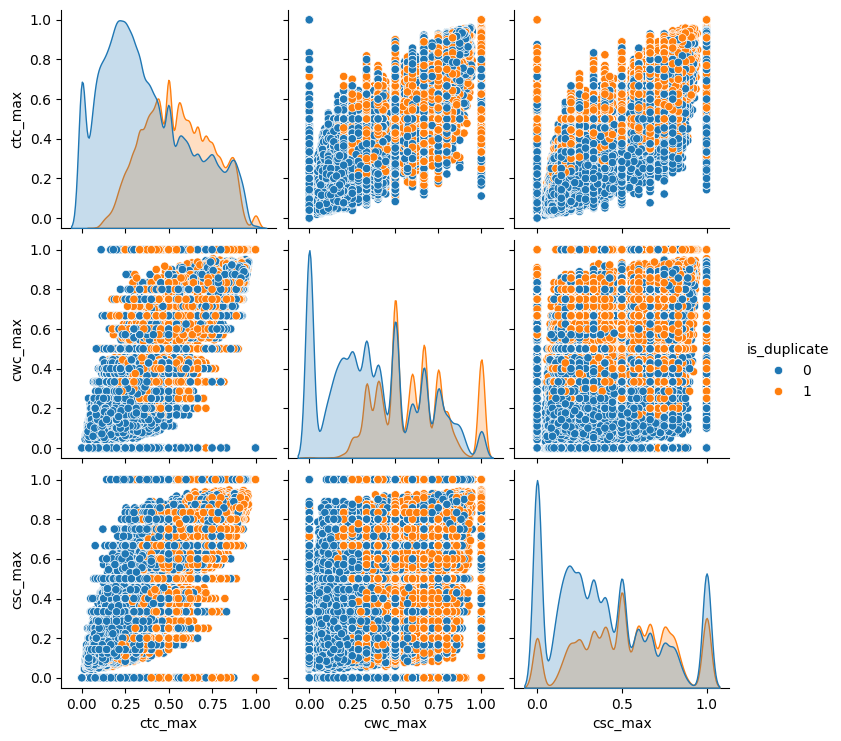

In [90]:
sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

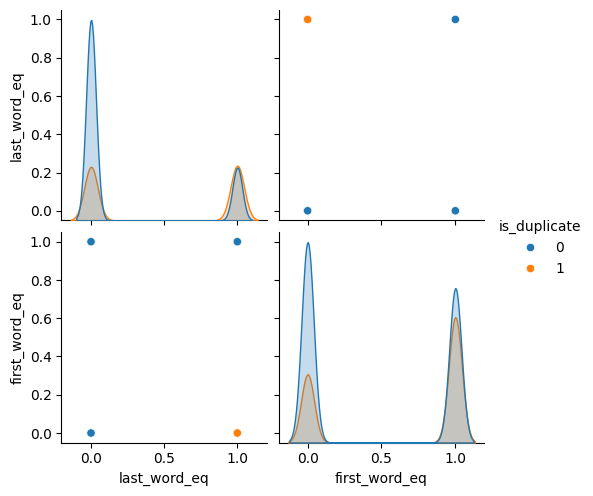

In [91]:
sns.pairplot(df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

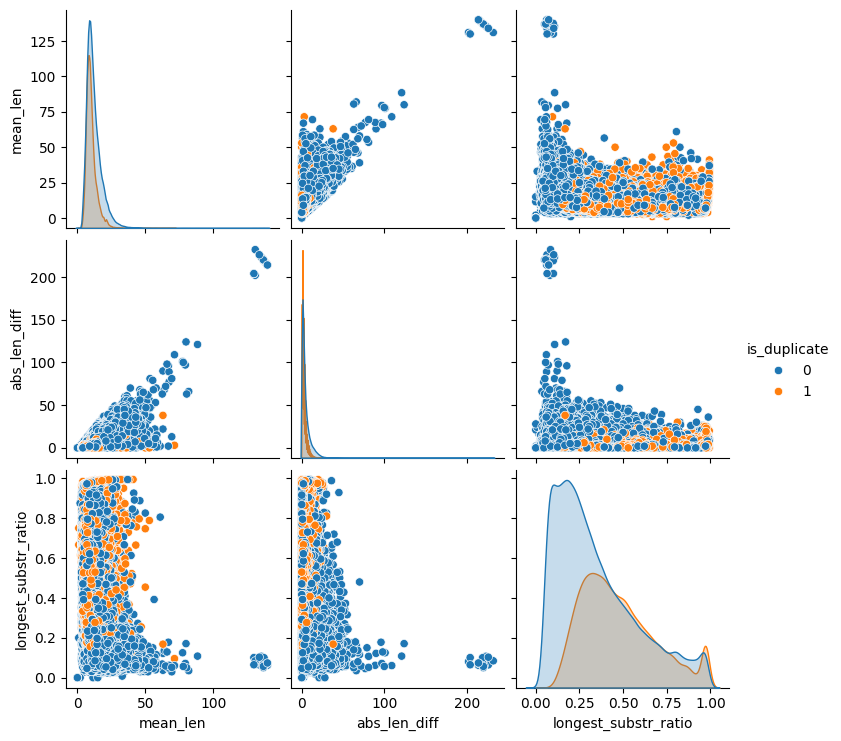

In [92]:
sns.pairplot(df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

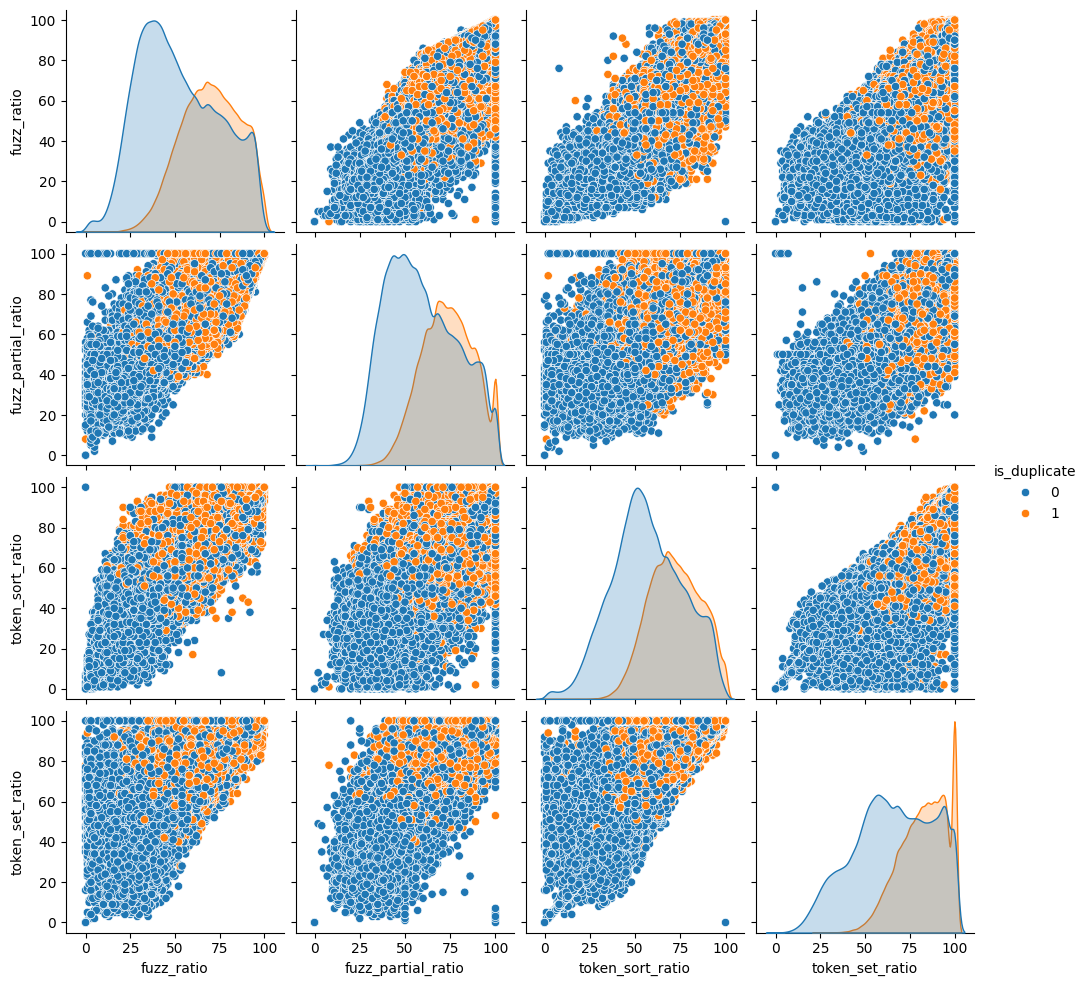

In [93]:
sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [94]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = df['is_duplicate'].values

In [95]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 404287 samples in 3.003s...
[t-SNE] Computed neighbors for 404287 samples in 738.797s...
[t-SNE] Computed conditional probabilities for sample 1000 / 404287
[t-SNE] Computed conditional probabilities for sample 2000 / 404287
[t-SNE] Computed conditional probabilities for sample 3000 / 404287
[t-SNE] Computed conditional probabilities for sample 4000 / 404287
[t-SNE] Computed conditional probabilities for sample 5000 / 404287
[t-SNE] Computed conditional probabilities for sample 6000 / 404287
[t-SNE] Computed conditional probabilities for sample 7000 / 404287
[t-SNE] Computed conditional probabilities for sample 8000 / 404287
[t-SNE] Computed conditional probabilities for sample 9000 / 404287
[t-SNE] Computed conditional probabilities for sample 10000 / 404287
[t-SNE] Computed conditional probabilities for sample 11000 / 404287
[t-SNE] Computed conditional probabilities for sample 12000 / 404287
[t-SNE] Computed conditional proba

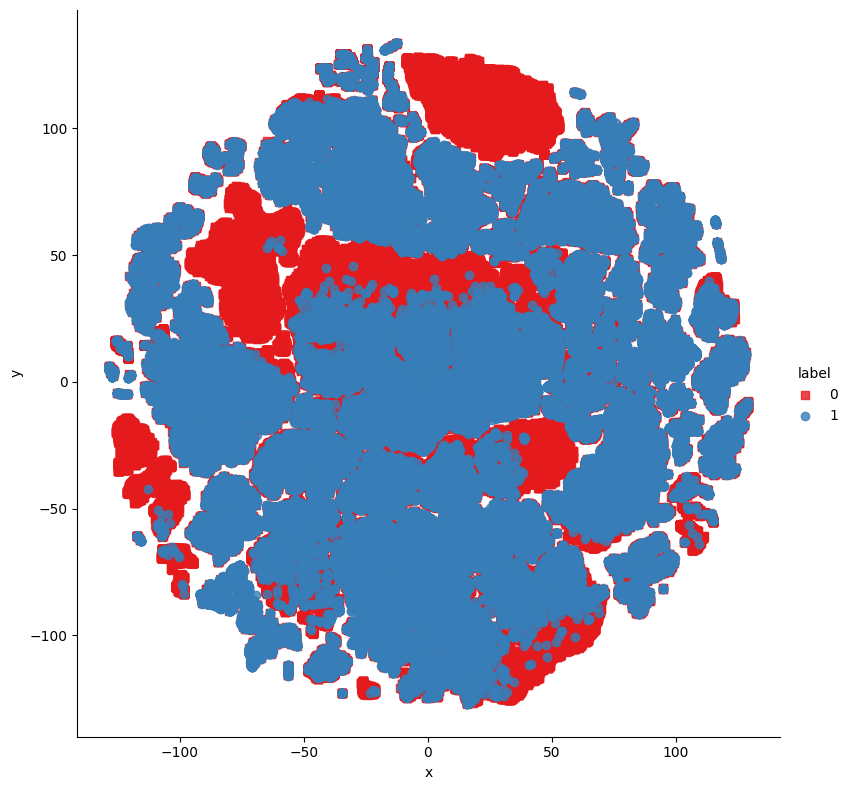

In [96]:
x_df = pd.DataFrame({'x': tsne2d[:, 0], 'y': tsne2d[:, 1], 'label': y})

# Plot using lmplot
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8, palette="Set1", markers=['s', 'o'])

# Show the plot
plt.show()

In [ ]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 404287 samples in 5.077s...
[t-SNE] Computed neighbors for 404287 samples in 655.328s...
[t-SNE] Computed conditional probabilities for sample 1000 / 404287
[t-SNE] Computed conditional probabilities for sample 2000 / 404287
[t-SNE] Computed conditional probabilities for sample 3000 / 404287
[t-SNE] Computed conditional probabilities for sample 4000 / 404287
[t-SNE] Computed conditional probabilities for sample 5000 / 404287
[t-SNE] Computed conditional probabilities for sample 6000 / 404287
[t-SNE] Computed conditional probabilities for sample 7000 / 404287
[t-SNE] Computed conditional probabilities for sample 8000 / 404287
[t-SNE] Computed conditional probabilities for sample 9000 / 404287
[t-SNE] Computed conditional probabilities for sample 10000 / 404287
[t-SNE] Computed conditional probabilities for sample 11000 / 404287
[t-SNE] Computed conditional probabilities for sample 12000 / 404287
[t-SNE] Computed conditional proba

In [2]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

NameError: name 'tsne3d' is not defined

In [3]:
ques_df = df[['question1','question2']]
ques_df.head()

NameError: name 'df' is not defined

In [ ]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()